# 1. Importing Libraries and Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('./BankChurners.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [3]:
len(df)

10127

In [4]:
cols = np.arange(21,df.shape[1])
df.drop(df.columns[cols],axis=1,inplace=True)
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

# 3. Exploratory Data Analysis

## 3.1 Based On Frequency of Use and Numeral Characteristics

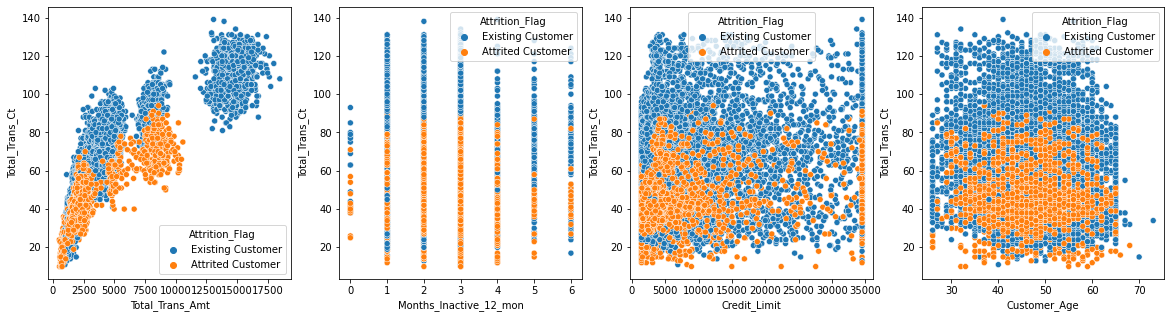

In [5]:
df_frequency=pd.concat([df['Customer_Age'],df['Total_Trans_Ct'],df['Total_Trans_Amt'],df['Months_Inactive_12_mon'],df['Credit_Limit'],df['Attrition_Flag']],axis=1)
fig,ax=plt.subplots(ncols=4,figsize=(20,5))
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Total_Trans_Amt",hue="Attrition_Flag",ax=ax[0])
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Months_Inactive_12_mon",hue="Attrition_Flag",ax=ax[1])
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Credit_Limit",hue="Attrition_Flag",ax=ax[2])
_scat=sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Customer_Age",hue="Attrition_Flag",ax=ax[3])

We see clearly above that we for all 4 features, we can point out the following hypothesis:
1. The higher they spend annually, the customers are more likely to remain.
2. After 2-3 months of inactivity, the customers are more likely to leave.
3. The higher the credit limit is, the customers are more likely to remain.
4. Age distribution does not really matter in this case, because the clusters are largely overlapped.
5. Almost all churned customers used their cards below 100 times.

## 3.2 Based On Demographics

In [6]:
df_demographic=pd.concat([df['Customer_Age'],df['Gender'],df['Education_Level'],df['Marital_Status'],df['Income_Category'],df['Attrition_Flag']],axis=1)

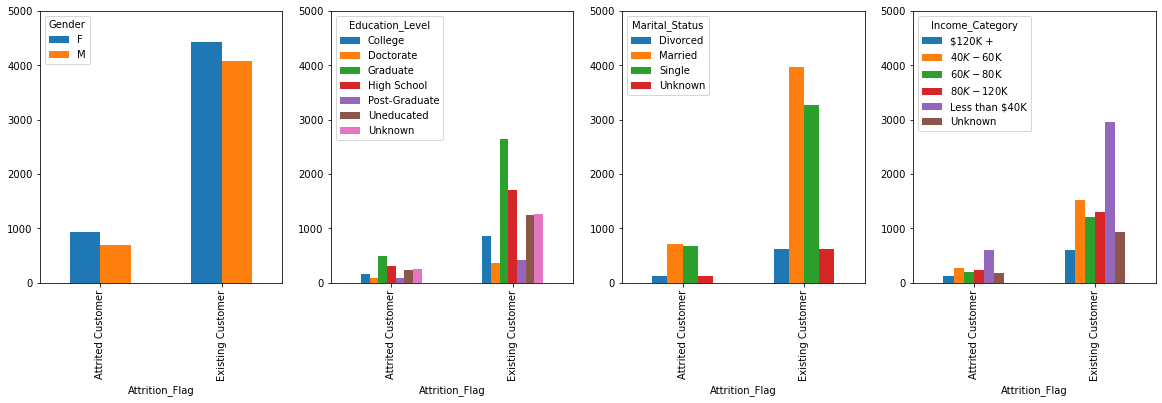

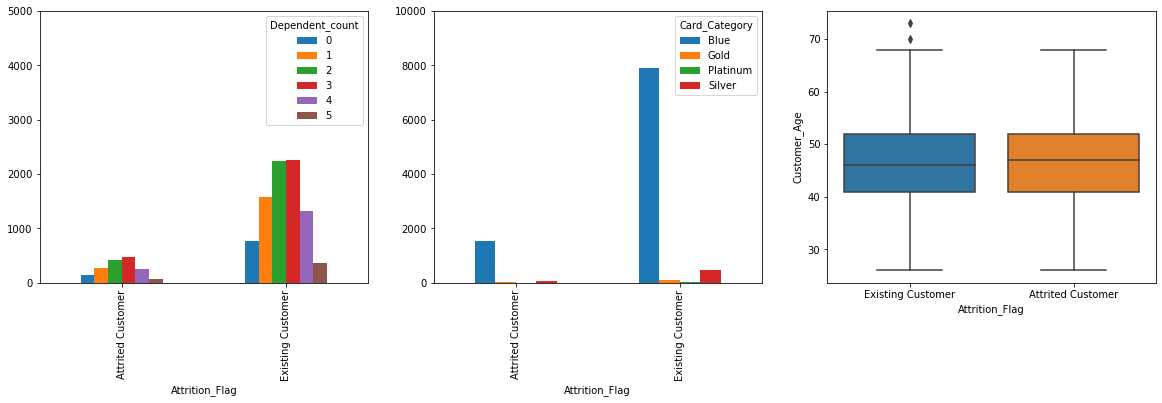

In [7]:
fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
_box=sns.boxplot(data = df_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)

# 4. Feature Engineering and Selection
## 4.1 Balance/Imbalance

First we check the event ratio of the dataset.

In [8]:
churn=df['Attrition_Flag'].value_counts()
churn
_piechart=plt.pie(x=churn,labels=churn.keys(),autopct="%.1f%%")

Not a great ratio to have. This shows an imbalance in the dataset which can result in predictors making false positives/negatives because the attrition data is undersampled. We will need to counter this issue later when building our model.

## 4.2 Correlation

Since we have a dataset with mixed features: categorical and numerical, we cannot simply use standard correlation function (Pearson coefficient). We will have to split the features into separate tables, and we measure numerical data correlation via Pearson coefficient

In [9]:
df_categorical=df.loc[:,df.dtypes==np.object]
df_categorical = df_categorical[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category','Attrition_Flag']]
df_categorical.head()

Gender Education_Level Marital_Status Income_Category Card_Category  \
0      M     High School        Married     $60K - $80K          Blue   
1      F        Graduate         Single  Less than $40K          Blue   
2      M        Graduate        Married    $80K - $120K          Blue   
3      F     High School        Unknown  Less than $40K          Blue   
4      M      Uneducated        Married     $60K - $80K          Blue   

      Attrition_Flag  
0  Existing Customer  
1  Existing Customer  
2  Existing Customer  
3  Existing Customer  
4  Existing Customer

In [10]:
df_numerical=df.loc[:,df.dtypes!=np.object]
df_numerical['Attrition_Flag']=df.loc[:,'Attrition_Flag']
oh=pd.get_dummies(df_numerical['Attrition_Flag'])
df_numerical=df_numerical.drop(['Attrition_Flag'],axis=1)
df_numerical=df_numerical.drop(['CLIENTNUM'],axis=1)
df_numerical=df_numerical.join(oh)
df_numerical.head()

<ipython-input-10-1f580e325e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['Attrition_Flag']=df.loc[:,'Attrition_Flag']


Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Attrited Customer  Existing Customer  
0                  0.061                  0                  1  
1                  0.105                  0                  1  
2                  0.000                  0                  1  
3                  0.760                  0                  1  
4                  0.000                  0                  1

In [11]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame() 

for i in df_categorical.columns :
  df_categorical_encoded[i]=label.fit_transform(df_categorical[i])

from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in df_categorical_encoded:
  col = []
  for var2 in df_categorical_encoded :
    cramers =cramers_V(df_categorical_encoded[var1], df_categorical_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
cramerv_matrix = pd.DataFrame(cramers_results, columns = df_categorical_encoded.columns, index =df_categorical_encoded.columns)
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))
cat_heatmap = sns.heatmap(cramerv_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We see here that the categorical columns are NOT CORRELATED with customer churn by themselves. This supports the previous figures that show similar distribution between existing and churned customers across all demographic. Building an accurate model without considering the numerical values is impossible.

Now let's check the correlation of the numerical values.

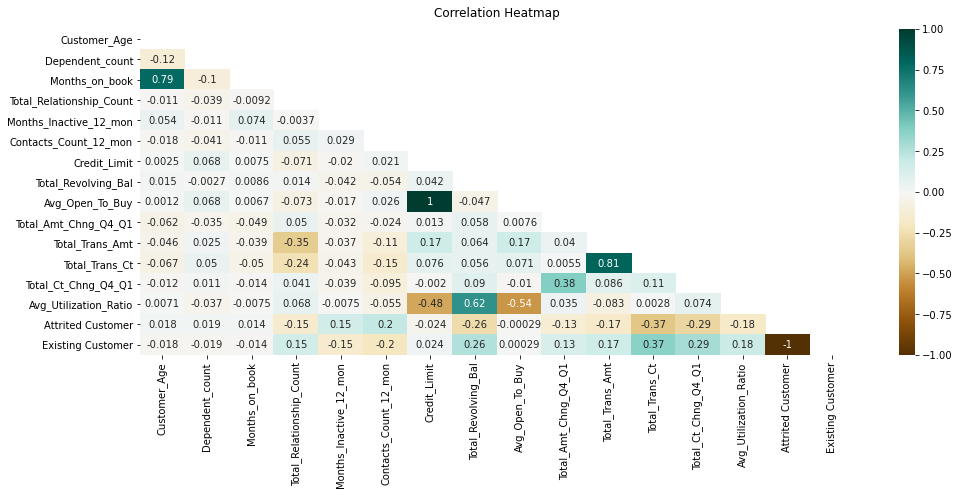

In [12]:
##Point Biserial Correlation
from scipy import stats
num_corr=df_numerical.corr()
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(num_corr, dtype=np.bool))
num_heatmap = sns.heatmap(num_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
num_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We now see better correlation measurements to the customer churn. In the heatmap above, the correlation coefficient of attrited and existing customer to all feature columns are identical in numbers, with mirroring signs (+ and -).
Let's view them better:

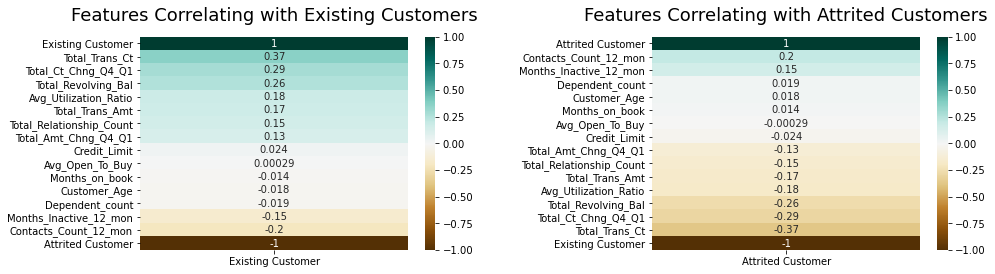

In [13]:
fig, ax=plt.subplots(ncols=2,figsize=(15, 5))

heatmap = sns.heatmap(num_corr[['Existing Customer']].sort_values(by='Existing Customer', ascending=False), ax=ax[0],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Existing Customers', fontdict={'fontsize':18}, pad=16);
heatmap = sns.heatmap(num_corr[['Attrited Customer']].sort_values(by='Attrited Customer', ascending=False), ax=ax[1],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Attrited Customers', fontdict={'fontsize':18}, pad=16);

fig.tight_layout(pad=5)

We see above that the following features are not correlated with customer churn (between -0.1 and +0.1) :
1. Credit Limit
2. Average Open To Buy
3. Months On Book
4. Age
5. Dependent Count

## 4.3 Removing Non-Correlating Columns

We discard the features mentioned above to build an accurate model.

In [14]:
df_model=df
df_model=df_model.drop(['CLIENTNUM','Credit_Limit','Customer_Age','Avg_Open_To_Buy','Months_on_book','Dependent_count'],axis=1)
df_model.head()

Attrition_Flag Gender Education_Level Marital_Status Income_Category  \
0  Existing Customer      M     High School        Married     $60K - $80K   
1  Existing Customer      F        Graduate         Single  Less than $40K   
2  Existing Customer      M        Graduate        Married    $80K - $120K   
3  Existing Customer      F     High School        Unknown  Less than $40K   
4  Existing Customer      M      Uneducated        Married     $60K - $80K   

  Card_Category  Total_Relationship_Count  Months_Inactive_12_mon  \
0          Blue                         5                       1   
1          Blue                         6                       1   
2          Blue                         4                       1   
3          Blue                         3                       4   
4          Blue                         5                       1   

   Contacts_Count_12_mon  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                      3                  777                 1.335   
1                      2                  864                 1.541   
2                      0                    0                 2.594   
3                      1                 2517                 1.405   
4                      0                    0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

## 4.4 One Hot Encoding

Now we convert the categorical features into binary with one hot encoding

In [15]:
df_model['Attrition_Flag'] = df_model['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
df_oh=pd.get_dummies(df_model)
df_oh['Attrition_Flag'] = df_oh['Attrition_Flag'].map({1: 'Existing Customer', 0: 'Attrited Customer'})
list(df_oh.columns)

['Attrition_Flag',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Gender_F',
 'Gender_M',
 'Education_Level_College',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Uneducated',
 'Education_Level_Unknown',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$120K +',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_Blue',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver']

# 5. Model Training

Now we train different classifiers and try to obtain the most accurate model.
We will utilize:
1. Random Forest
2. Support Vector Machine
3. Gradient Boosting

In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_oh.loc[:, df_oh.columns != 'Attrition_Flag']
y = df_oh['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
sm = SMOTE(sampling_strategy='minority', k_neighbors=20, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## 5.2 Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_res, y_train_res)

RandomForestClassifier()

## 5.3 Support Vector Machine

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(X_train_res, y_train_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

## 5.4 Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)
gb_clf.fit(X_train_res, y_train_res)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

# 6. Prediction Models

## 6.1 First Prediction

In [21]:
y_rf=rf_clf.predict(X_test)
y_svm=svm_clf.predict(X_test)
y_gb=gb_clf.predict(X_test)

## 6.2 First Evaluation

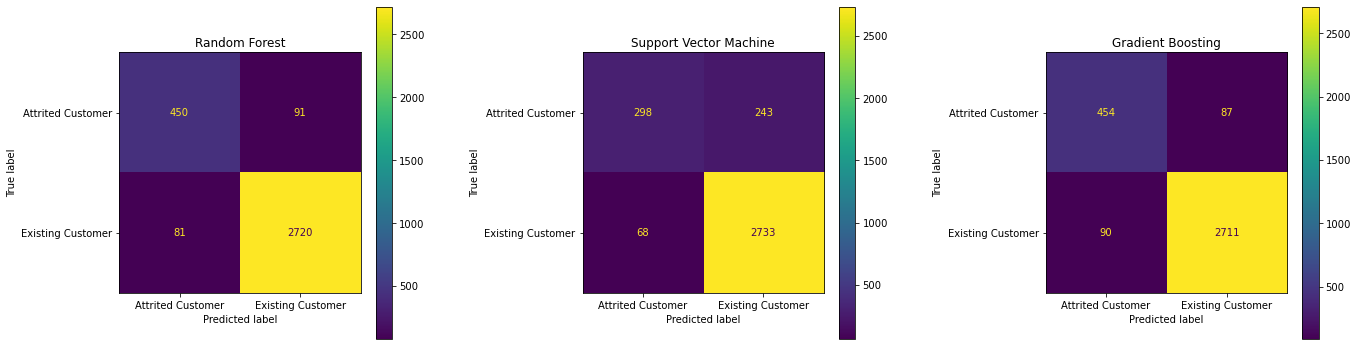

In [22]:
from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(ncols=3, figsize=(20,6))
plot_confusion_matrix(rf_clf, X_test, y_test, ax=ax[0])
ax[0].title.set_text('Random Forest')
plot_confusion_matrix(svm_clf, X_test, y_test, ax=ax[1])
ax[1].title.set_text('Support Vector Machine')
plot_confusion_matrix(gb_clf, X_test, y_test, ax=ax[2])
ax[2].title.set_text('Gradient Boosting')
fig.tight_layout(pad=5)

In [23]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
print('Random Forest Classifier')
print(classification_report(y_test, y_rf))
print('------------------------')
print('Support Vector Machine')
print(classification_report(y_test, y_svm))
print('------------------------')
print('Gradient Boosting')
print(classification_report(y_test, y_gb))

Random Forest Classifier
                   precision    recall  f1-score   support

Attrited Customer       0.85      0.83      0.84       541
Existing Customer       0.97      0.97      0.97      2801

         accuracy                           0.95      3342
        macro avg       0.91      0.90      0.90      3342
     weighted avg       0.95      0.95      0.95      3342

------------------------
Support Vector Machine
                   precision    recall  f1-score   support

Attrited Customer       0.81      0.55      0.66       541
Existing Customer       0.92      0.98      0.95      2801

         accuracy                           0.91      3342
        macro avg       0.87      0.76      0.80      3342
     weighted avg       0.90      0.91      0.90      3342

------------------------
Gradient Boosting
                   precision    recall  f1-score   support

Attrited Customer       0.83      0.84      0.84       541
Existing Customer       0.97      0.97      0.97   

In [24]:
pip install -- pywin32==227

Note: you may need to restart the kernel to use updated packages.


We see in both the confusion matrix and classification report that random forest and gradient boosting works best with recall score above 85%.